In [2]:
import random
import math
from matplotlib import pyplot

def euclidian_distance(x1,y1,x2,y2):
    return math.sqrt((y1-y2)**2 + (x1-x2)**2)

def vector_addiction(vector1, vector2):
    return [i+j for i,j in zip(vector1, vector2)]

def scalar_multiplication(vector, scalar):
    return [scalar*i for i in vector]

def index_where_equals(vector, value):
    return [i for i in range(len(vector)) if vector[i] == value]

def random_list(no,minimum=0,maximum=100):
    return [random.randint(minimum, maximum) for i in range(no)]

In [3]:
class KMeans:
    def __init__(self,clusters = 2):
        self.clusters = clusters
        
    def fit(self ,x,y, iterations=5):
        self.x = x
        self.y = y
        
        x_min, x_max = min(x), max(x)
        y_min, y_max = min(x), max(x)
    
        self.cluster_center = [[random.randint(x_min, x_max),random.randint(y_min, y_max )] for i in range(self.clusters)]

        for i in range(iterations):
            self.assign_cluster()
            self.visualize(str(i)+'assign')
            self.relocate_clusters()
            self.visualize(str(i)+'relocate')
        
        self.assign_cluster()
        
    def slow_fit(self, x,y):
        self.x = x
        self.y = y
        
        x_min, x_max = min(x), max(x)
        y_min, y_max = min(x), max(x)
    
        self.cluster_center = [[random.randint(x_min, x_max),random.randint(y_min, y_max )] for i in range(self.clusters)]

    def nearest_cluster(self,x,y):
        min_cluster = None
        min_distance = None
        
        for i in range(len(self.cluster_center)):
            cluster_x, cluster_y = self.cluster_center[i]
            
            distance = euclidian_distance(cluster_x, cluster_y, x, y)
            
            if not min_distance or min_distance > distance:
                min_distance = distance
                min_cluster = i
        
        return min_cluster
    
    def assign_cluster(self):
        self.cluster_assignment = []
        
        for i in range(len(self.x)):
            self.cluster_assignment.append(self.nearest_cluster(self.x[i], self.y[i]))
        
        return self.cluster_assignment
    
    def relocate_clusters(self):
        temp = {}
        
        no_of_points_in_cluster = {}
        
        for cluster_no,i,j in zip(self.cluster_assignment,x,y):
            temp.setdefault(cluster_no,[0,0])
            temp[cluster_no] = vector_addiction(temp[cluster_no],[i,j])
            
            no_of_points_in_cluster.setdefault(cluster_no, 0)
            no_of_points_in_cluster[cluster_no] += 1
        
        for key, value in temp.items():
            self.cluster_center[key] = scalar_multiplication(value, 1/no_of_points_in_cluster[key])
        
        return self.cluster_center
    
    def visualize(self, save_name = None):
        graph = pyplot
        graph.clf()
        cluster_x = [i[0] for i in self.cluster_center]
        cluster_y = [i[1] for i in self.cluster_center]
        
        colors = ['r', 'b', 'g', 'k', 'm']
        markers = ['P','v','*','s','X']

        for i in range(len(self.cluster_center)):
            point_no = index_where_equals(self.cluster_assignment,i)
            
            x = [self.x[i] for i in point_no]
            y = [self.y[i] for i in point_no]
            graph.scatter(x, y, c= colors[i])

            graph.scatter([cluster_x[i]], [cluster_y[i]],c=colors[i], marker = markers[i])
        
        
        if save_name:
            graph.title = save_name
            graph.savefig('/Users/ankushchoubey/Desktop/'+str(save_name) +'.png')

[17, 20, 29, 5, 16, 16, 12, 35, 25, 38, 81, 91, 100, 90, 87, 90, 87, 94, 84, 91, 654, 938, 870, 665, 649, 365, 404, 306, 763, 193, 1000, 51, 778, 669, 712, 941, 91, 319, 973, 5]
[23, 30, 23, 25, 16, 15, 12, 15, 32, 8, 83, 84, 97, 86, 82, 88, 84, 82, 82, 97, 714, 485, 609, 251, 727, 533, 256, 923, 538, 225, 712, 735, 342, 811, 265, 959, 74, 881, 92, 547]


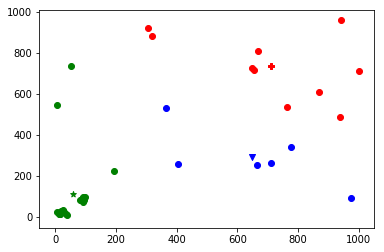

In [17]:
no_of_points = 10
x = random_list(no_of_points,0,40) + random_list(no_of_points,80,100) + random_list(no_of_points+10,0,1000)
y = random_list(no_of_points,0,40) + random_list(no_of_points,80,100) + random_list(no_of_points+10,0,1000)


print(x)
print(y)
engine = KMeans(3)
engine.fit(x,y, 10)

%matplotlib inline
engine.visualize()

In [6]:
# check it step by step
engine_slow = KMeans(2)
engine_slow.slow_fit(x,y)

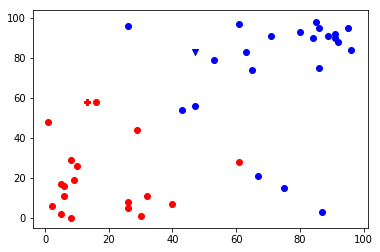

In [7]:
engine_slow.assign_cluster()
%matplotlib inline
engine_slow.visualize()

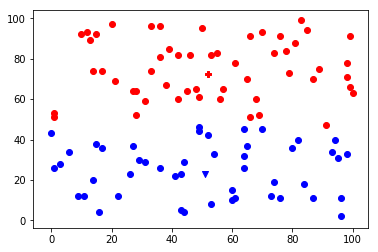

In [304]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

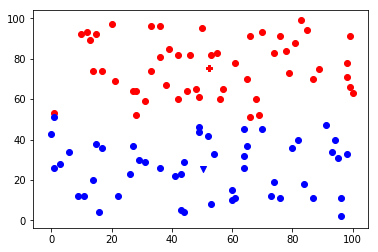

In [305]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

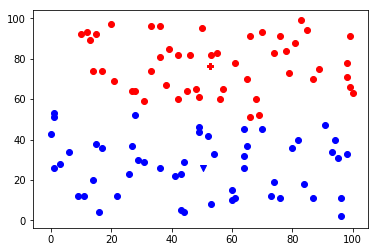

In [306]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

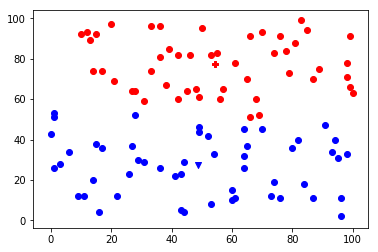

In [307]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

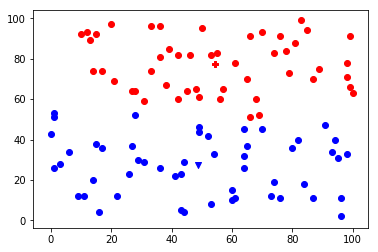

In [308]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

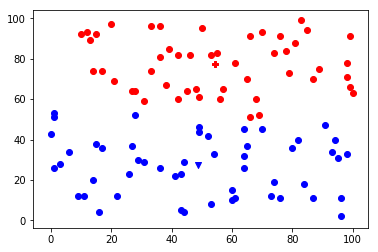

In [309]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()